# DS321: Computational Statistics <br>

##   Laboratory Exercise: Resampling Methods

University of Science and Technology of Southern Philippines <br>

## Student Name: <code>Student Name</code>


Instructor: **Romen Samuel Wabina, MSc** <br>
MSc Data Science and AI | Asian Institute of Technology <br>
*ongoing* PhD Data Science (Healthcare and Clinical Informatics) 


### Instructions
- Please submit this laboratory exercise as a **Jupyter Notebook file** <code>.ipynb</code> via email <code>romensamuelrodis.wab@student.mahidol.edu</code>

# A. Cross Validation

#### K-Fold Cross Validation
KFold divides the samples into k groups (folds) of approximately equal sizes. Out of these k groups, k-1 folds are used for training and the remaning one is used for testing.
This process is repeated k times using the code: <code> KFold(n_splits = 5, *, shuffle = False, random_state = None) </code>


In [2]:
import numpy as np
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [5]:
X = ["a",'b','c','d','e','f']

kf = KFold(n_splits = 3,shuffle = False, random_state = None)
for train, test in kf.split(X):
    print('Train: ', train, 'Test: ', test)

Train:  [2 3 4 5] Test:  [0 1]
Train:  [0 1 4 5] Test:  [2 3]
Train:  [0 1 2 3] Test:  [4 5]


#### Stratified K-Fold 

This technique is a variation of K-Fold, and it divides the data into k-stratified folds. This way it preserves the percentage of samples of each class present in the data. It generates test sets such that all sets contain the same distribution of classes, or as close as possible

<code>sklearn.model_selection.StratifiedKFold(n_splits = 5, *, shuffle = False, random_state = None)</code>


In [6]:
from sklearn.model_selection import StratifiedKFold

X = np.array([[1,2], [3,4], [5,6], [7,8], [9,10], [11,12]])
y = np.array([0, 0, 1, 0, 1, 1])

skf = StratifiedKFold(n_splits = 3, random_state = None, shuffle = False)

for train_index,test_index in skf.split(X,y):
    print('Train: ', train_index, 'Test: ', test_index)
    X_train,X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]


Train:  [1 3 4 5] Test:  [0 2]
Train:  [0 2 3 5] Test:  [1 4]
Train:  [0 1 2 4] Test:  [3 5]


#### Leave One Out Cross Validation

This is a simple technique in which training data inlcudes all observations in the data except one observation which will be used to test. For $n$ samples, we have $n$ different training sets. Although this model is trained on almost all of the data, the number of iterations and n different training sets, makes it computationally very expensive. Almost all of the data ($n-1$ of the $n$ samples) is used to build each model, all of the models are identical to each other and this results in high variance compared KFold.

<code>sklearn.model_selection import LeaveOneOut()</code>


In [10]:
from sklearn.model_selection import LeaveOneOut

X = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
l = LeaveOneOut()

for train, test in l.split(X):
    print("%s %s"% (train,test))

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


#### <code>Question 1 (10 points): Explain the advantages and disadvantages of the cross-validation methods above. You can provide examples and scenarios to strengthen your arguments in this query and achieve full marks</code>. 

### GridSearch Cross Validation

The GridSearch Cross Validation (GridSearchCV) is the widely-used CV method in machine learning. GridSearchCV (Grid Search Cross Validation) is a technique used for hyperparameter tuning in machine learning models. It is a method of systematically searching for the best combination of hyperparameters to optimize the model's performance.

In GridSearchCV, a range of hyperparameter values is defined for each hyperparameter of the model, and the algorithm exhaustively searches all possible combinations of hyperparameters using cross-validation to evaluate each combination's performance. The model is trained on various subsets of the data and evaluated on the remaining data. The process is repeated for each combination of hyperparameters.

GridSearchCV is widely used in machine learning to find the best combination of hyperparameters for a given model. It is an essential tool for fine-tuning models to achieve better performance. The resulting hyperparameters can then be used to train the final model with the complete dataset.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import warnings 
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [16]:
df_colon = pd.read_csv('data/colon.csv')
XX = df_colon.drop('Class', axis = 1)
yy = df_colon['Class']

X, y = XX.to_numpy(), yy.to_numpy()
y = y.flatten()

smote = SMOTE()
X, y = smote.fit_resample(X, y)

random.seed(413)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

random.seed(413)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

This code trains a machine learning model using k-Nearest Neighbors (KNN) algorithm and performs hyperparameter tuning using GridSearchCV.

The <code>main()</code> function takes in training and testing data, the KNN model to use, and a dictionary of hyperparameters to be tuned. It also takes in a boolean variable display_train to decide whether to display the performance metrics of the training set.

The <code>GridSearchCV()</code> method performs an exhaustive search over a specified hyperparameter space to find the best combination of hyperparameters that optimize the given scoring metric. In this case, the metric used is 'recall', which is a measure of the proportion of true positives that were correctly classified. The cv parameter specifies the number of cross-validation folds to be used, and refit parameter tells the <code>GridSearchCV()</code> to use the 'recall' scoring metric to select the best hyperparameters.

After fitting the grid search to the training data, the best hyperparameters are printed using the best_params_ and best_score_ attributes of the <code>GridSearchCV()</code> object.

Finally, the predictions and yhat variables are used to make predictions on the training and testing data, respectively. The display_results() function prints the confusion matrix and classification report for both the training and testing sets, which include metrics such as precision, recall, and F1 score.

In [25]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score

def display_results(y, prediction, set = 'Training Set'):
     print(f'======================= {set} =======================')
     print(confusion_matrix(y, prediction))
     print(classification_report(y, prediction, target_names = ['No Cancer', 'Cancer']))

def main(X_train, X_test, y_train, y_test, model, param_grid = {'n_neighbors': [1, 2]}, display_train = True):
     start = time()
     
     # We used stratified shuffle split with 10 folds
     cv = KFold(n_splits = 10, shuffle = True,  random_state = 42)
     random.seed(413)

     # We used the accuracy as a refit to determine the best samples with the best accuracy
     grid = GridSearchCV(model, param_grid = param_grid, cv = cv, refit = 'accuracy')
     grid.fit(X_train, y_train) 

     print(f'The best parameters are {grid.best_params_} with a score of {grid.best_score_:.2f}')
     
     predictions = grid.predict(X_train)
     yhat = grid.predict(X_test)
     print(f"Fit and predict time: {np.round(time() - start, 4)} seconds")
     if display_train:
          display_results(y_train, predictions, set = 'Training Set')
     display_results(y_test, yhat, set = 'Testing Set')

In [26]:
model_distance = KNeighborsClassifier(weights = 'distance')
main(X_train, X_test, y_train, y_test, model_distance, display_train = False)

The best parameters are {'n_neighbors': 1} with a score of 0.81
Fit and predict time: 5.069 seconds
======================= Testing Set =======================
[[7 1]
 [0 8]]
              precision    recall  f1-score   support

   No Cancer       1.00      0.88      0.93         8
      Cancer       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



#### <code>Question 2 (10 points): Modify the code above and train the model by using KNN at neighbors [3,12] using recall, precision, and accuracy as its refit strategy. Determine which number of neighbors got the best parameters with the highest recall, precision, and accuracy</code>. 

#### <code>Question 3 (10 points): Using the same parameters in Question 2, utilize StratifiedShuffleSplit as the cross validation method with 10 folds. Explain the difference of the results from Question 2 and Question 3. Which is better and why?</code>.  

#### <code>Question 4 (5 points): Explain the benefits that make GridSearchCV a popular choice among data scientists and machine learning practitioners</code>. 

## Let's try Support Vector Machines with Cross Validation

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import warnings 
warnings.filterwarnings('ignore')

from time import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [37]:
df_colon = pd.read_csv('data/colon.csv')
XX = df_colon[['T62947', 'H64807']]
yy = df_colon['Class']

XX, yy = XX.to_numpy(), yy.to_numpy()
yy = yy.flatten()

smote = SMOTE()
X, y = smote.fit_resample(XX, yy)

random.seed(413)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

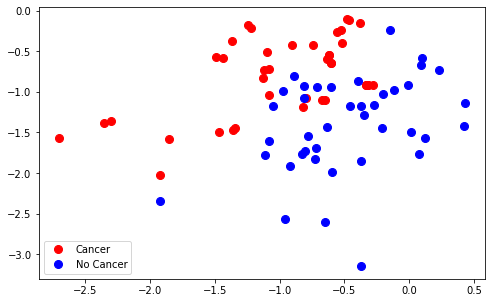

In [38]:
def plot_data(X, y):
    y = y.flatten()
    class1 = (y ==  1)
    class2 = (y == -1)
    plt.figure(figsize=(8, 5))    
    plt.plot(X[:,0][class1], X[:,1][class1], 'ro', markersize = 8, label = 'Cancer')
    plt.plot(X[:,0][class2], X[:,1][class2], 'bo', markersize = 8, label = 'No Cancer')
    plt.legend(loc = 'lower left')

plot_data(X, y)

#### <code>Question 5 (10 points): Modify the code below and train the model by using SVM using recall, precision, and accuracy as its refit strategy. Determine which set of parameters from the GridSearchCV got the highest score. Use StratifiedShuffleSplit as its cross validation method</code>. 

In [33]:
tuned_parameters = [{'kernel': ['rbf'],     'gamma': [1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-7], 'C': [0.001, 0.10, 0.1, 10, 20, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-7], 'C': [0.001, 0.10, 0.1, 10, 20, 25, 50, 100, 1000]},
                    {'kernel': ['linear'],                                              'C': [0.001, 0.10, 0.1, 10, 20, 25, 50, 100, 1000]}]

scoring = {'Precision': 'precision', 'Recall': 'recall', 'Accuracy': 'accuracy', 
           'AUC': 'roc_auc', 'F1': 'f1_micro'}
    
random.seed(413)
for name, score in zip(scoring.keys(), scoring.values()):
    clf = GridSearchCV(SVC(C = 1), param_grid = tuned_parameters, cv = 5,
                        scoring = score, refit = 'Accuracy',
                        return_train_score = True)
    
    clf.fit(X_train, y_train)
    results = clf.cv_results_
    print(f'Best parameter set found on development set for {name}: \t {clf.best_params_}')

Best parameter set found on development set for Precision: 	 {'C': 20, 'gamma': 1, 'kernel': 'rbf'}
Best parameter set found on development set for Recall: 	 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best parameter set found on development set for Accuracy: 	 {'C': 20, 'gamma': 1, 'kernel': 'rbf'}
Best parameter set found on development set for AUC: 	 {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best parameter set found on development set for F1: 	 {'C': 20, 'gamma': 1, 'kernel': 'rbf'}


<Figure size 1080x720 with 0 Axes>

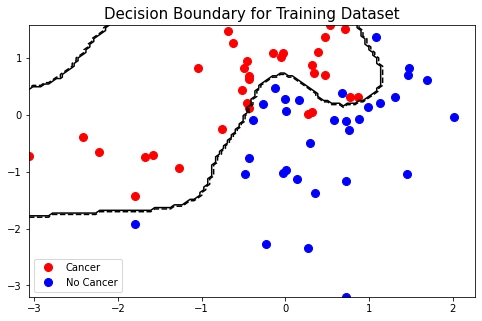

In [34]:
random.seed(413)
svclassifier = SVC(kernel = 'rbf', C = 20, gamma = 1)
svclassifier.fit(X_train, y_train)

def visualize_boundary(X, y, model, title):
    plt.figure(figsize = (15, 10))
    plot_data(X, y)
    X_21, X_22 = np.meshgrid(np.linspace(X[:,0].min(), X[:,1].max(), num = 100), 
                             np.linspace(X[:,1].min(), X[:,1].max(), num = 100))
    plt.contour(X_21, X_22, model.predict(np.array([X_21.ravel(),X_22.ravel()]).T).reshape(X_21.shape), 1, colors = 'k')
    plt.title(title, size = 15)
    plt.legend(loc = 'lower left')
    plt.show()

random.seed(413)
visualize_boundary(X_train, y_train, svclassifier, 
                   title = 'Decision Boundary for Training Dataset')

In [36]:
y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = ['No Cancer', 'Cancer']))

[[8 0]
 [1 7]]
              precision    recall  f1-score   support

   No Cancer       0.89      1.00      0.94         8
      Cancer       1.00      0.88      0.93         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16

